In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
from skimage.morphology import skeletonize, thin
from skimage.measure import find_contours, approximate_polygon, \
    subdivide_polygon

**TODO**  
- Restar el área de los contornos interiores  

**DONE**  
- Descubrir cómo marcar los contornos interiores  
- Comprobar si puedo contar el perímetro del skeleton sin findContours (no lo he necesitado)

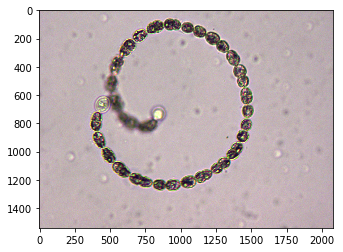

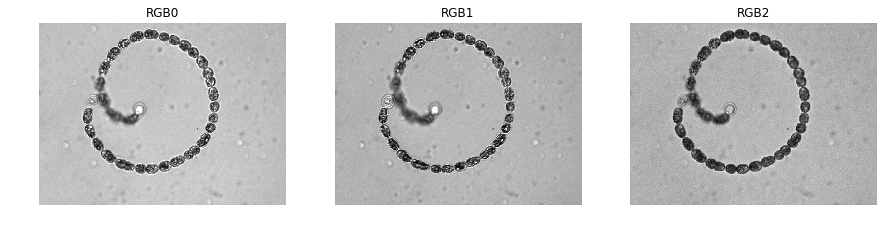

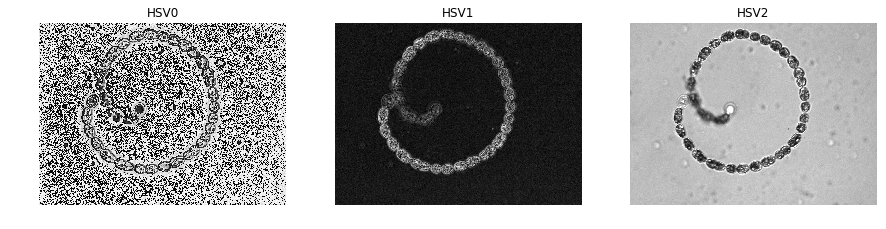

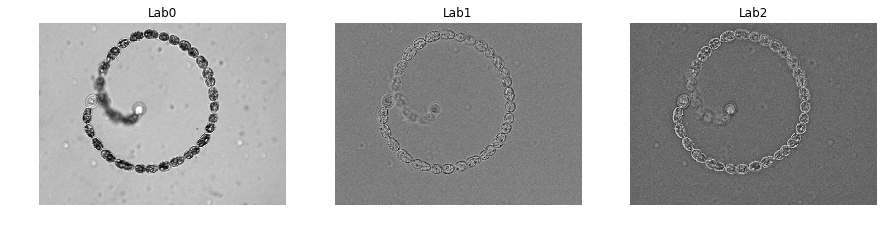

In [152]:
# im = cv2.imread('dataset/Single 40x - Anabaena spiroides 1.jpg')
# im = cv2.imread('dataset/Single 40x - Anabaena spiroides 2.jpg')
# im = cv2.imread('dataset/Single 40x - Anabaena spiroides 3.jpg')
im = cv2.imread('dataset/Single 40x - Anabaena spiroides 4.jpg')
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)
plt.show()
im_hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
im_lab = cv2.cvtColor(im, cv2.COLOR_BGR2Lab)

images = [im_rgb, im_hsv, im_lab]
names = ['RGB', 'HSV', 'Lab']
for n, img in enumerate(images):
    fig, axeslist = plt.subplots(ncols=3, nrows=1,figsize=(15,15))
    for i in range(3):
        axeslist.ravel()[i].imshow(img[:,:,i], cmap='gray')
        axeslist.ravel()[i].set_title(names[n] + str(i))
        axeslist.ravel()[i].set_axis_off()
    plt.show()

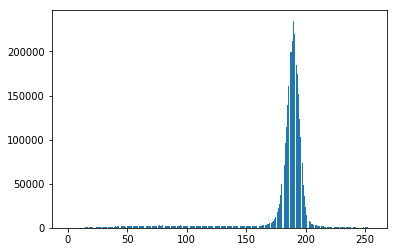

In [154]:
img = im_lab[:,:,0]
hist, _ = np.histogram(img, 256, [0, 256])
plt.bar(range(0,256), hist)
plt.show()

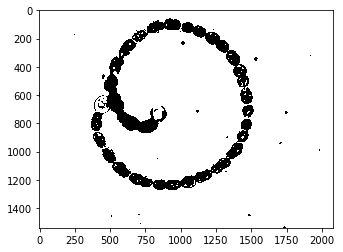

In [155]:
blur = cv2.GaussianBlur(img,(11,11),0)
ret,thresh = cv2.threshold(blur,160,255,0)
plt.imshow(thresh, cmap='gray')
plt.show()

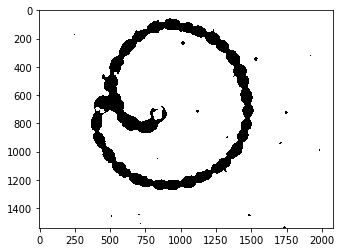

In [156]:
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(40,40))
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(25,25))
closing = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
plt.imshow(closing, cmap='gray')
plt.show()

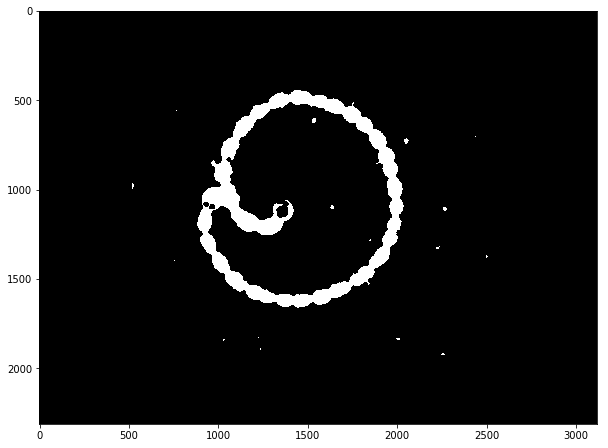

In [157]:
newimage = np.ones((int(closing.shape[0]*1.5), int(closing.shape[1]*1.5))) * 255
newimage[int(closing.shape[0]*0.25):int(closing.shape[0]*1.25), int(closing.shape[1]*0.25):int(closing.shape[1]*1.25)] = closing
plt.figure(figsize=(10,8))
plt.imshow(255-newimage, cmap='gray')
plt.show()

In [158]:
# from skimage import measure

In [159]:
# np.unique(labeled)

In [160]:
# labeled = measure.label(newimage, background=255)
# plt.figure(figsize=(10,8))
# plt.imshow(labeled)
# plt.show()

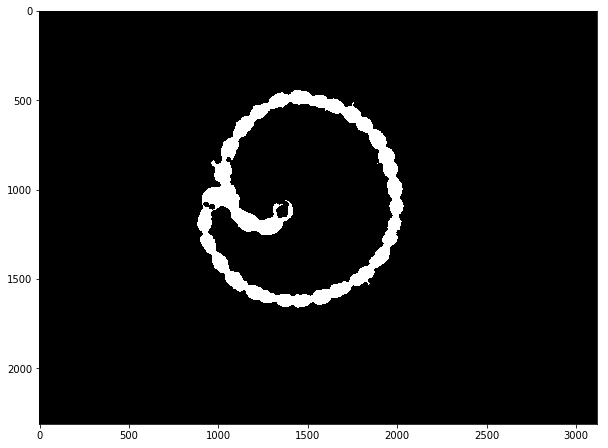

In [161]:
_, contours, hierarchy = cv2.findContours(((255-newimage)/255.0).astype(np.uint8),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) 

contours.sort(key=cv2.contourArea, reverse=True)
mask = np.zeros(newimage.shape,np.uint8)
cv2.drawContours(mask,contours,0,(255,255,255), thickness=-1, lineType=8, hierarchy=hierarchy, maxLevel=0)
area = cv2.contourArea(contours[0])
for i in range(1,hierarchy.shape[1]):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(mask,contours,i,(0,0,0), thickness=-1, lineType=8, hierarchy=hierarchy, maxLevel=0)
        area -= cv2.contourArea(contours[i])
plt.figure(figsize=(10,8))
cv2.imwrite('area.png',mask)
plt.imshow(mask, cmap='gray')
plt.show()

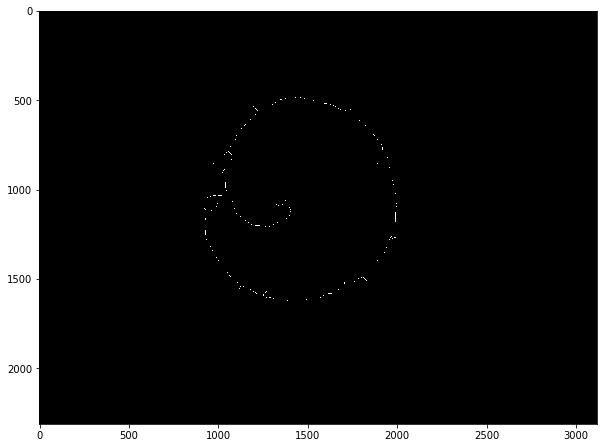

In [162]:
# perform skeletonization
# skeleton = skeletonize(image/255)
skeleton = skeletonize(mask/255)
cv2.imwrite('skeleton.png',np.uint8(skeleton)*255)
# thinned = thin(mask/255)
plt.figure(figsize=(10,8))
plt.imshow(skeleton, cmap='gray',interpolation="nearest")
plt.show()

21982.883177757263


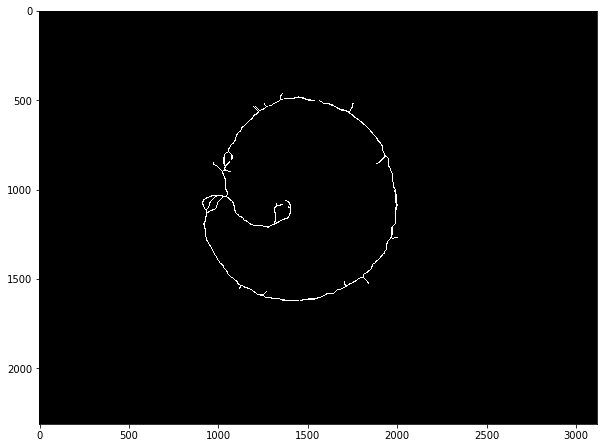

In [163]:
_, contours, hierarchy = cv2.findContours(skeleton.astype(int),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_NONE)
contours.sort(key=lambda c: cv2.arcLength(c, False), reverse=True)
perimeter = 0
for c in contours:
    perimeter += cv2.arcLength(c,False)
skelemask = np.zeros(skeleton.shape,np.uint8)
# cv2.drawContours(skelemask,contours,-1,(255,255,255), thickness=3)
cv2.drawContours(skelemask,contours,-1,(255,255,255), thickness=3, lineType=8, hierarchy=hierarchy)
cv2.imwrite('skelemask.png',skelemask)
plt.figure(figsize=(10,8))
plt.imshow(skelemask, cmap='gray')
plt.show()

In [164]:
# contour = np.array([list(i[0]) for i in contours[0]])
# for _ in range(5):
#     contour = subdivide_polygon(contour, degree=2, preserve_ends=True)
# # approximate subdivided polygon with Douglas-Peucker algorithm
# appr = approximate_polygon(contour, tolerance=0.02)

# plt.plot(appr[:,0], appr[:,1])

In [165]:
print('Area = {:0.2f}, Perimeter = {:0.2f}'.format(area,perimeter))
width = area/perimeter
print('Mean width = {:0.2f}'.format(width))
volume = np.pi * (width/2)*(width/2) * perimeter
print('Volume = {:0.2f}'.format(volume))

Area = 273102.00, Perimeter = 21982.88
Mean width = 12.42
Volume = 2664740.92


-------

In [184]:
names = ['dataset/Single 40x - Anabaena spiroides 1.jpg',
         'dataset/Single 40x - Anabaena spiroides 2.jpg',
         'dataset/Single 40x - Anabaena spiroides 3.jpg',
         'dataset/Single 40x - Anabaena spiroides 4.jpg']
for image_name in names:
    short_name = image_name.split('- ')[-1].split('.jpg')[0]
    im = cv2.imread(image_name)
    cv2.imwrite('{}.png'.format(short_name),im)
    im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    im_hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
    im_lab = cv2.cvtColor(im, cv2.COLOR_BGR2Lab)

    img = im_lab[:,:,0]

    blur = cv2.GaussianBlur(img,(11,11),0)
    ret,thresh = cv2.threshold(blur,160,255,0)

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(25,25))
    closing = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

    newimage = np.ones((int(closing.shape[0]*1.5), int(closing.shape[1]*1.5))) * 255
    newimage[int(closing.shape[0]*0.25):int(closing.shape[0]*1.25), int(closing.shape[1]*0.25):int(closing.shape[1]*1.25)] = closing

    _, contours, hierarchy = cv2.findContours(((255-newimage)/255.0).astype(np.uint8),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) 
    contours.sort(key=cv2.contourArea, reverse=True)
    mask = np.zeros(newimage.shape,np.uint8)
    cv2.drawContours(mask,contours,0,(255,255,255), thickness=-1, lineType=8, hierarchy=hierarchy, maxLevel=0)
    area = cv2.contourArea(contours[0])
    for i in range(1,hierarchy.shape[1]):
        if hierarchy[0][i][3] == -1:
            cv2.drawContours(mask,contours,i,(0,0,0), thickness=-1, lineType=8, hierarchy=hierarchy, maxLevel=0)
            area -= cv2.contourArea(contours[i])
    orig_mask = mask[int(closing.shape[0]*0.25):int(closing.shape[0]*1.25), int(closing.shape[1]*0.25):int(closing.shape[1]*1.25)]
    cv2.imwrite('{}-area.png'.format(short_name),orig_mask)

    skeleton = skeletonize(mask/255)
#     cv2.imwrite('{}-skeleton.png'.format(short_name),np.uint8(skeleton)*255)

    _, contours, hierarchy = cv2.findContours(skeleton.astype(int),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_NONE)
    contours.sort(key=lambda c: cv2.arcLength(c, False), reverse=True)
    perimeter = 0
    for c in contours:
        perimeter += cv2.arcLength(c,False)
    skelemask = np.zeros(skeleton.shape,np.uint8)
    cv2.drawContours(skelemask,contours,-1,(255,255,255), thickness=3, lineType=8, hierarchy=hierarchy)
    orig_skelemask = skelemask[int(closing.shape[0]*0.25):int(closing.shape[0]*1.25), int(closing.shape[1]*0.25):int(closing.shape[1]*1.25)]
    cv2.imwrite('{}-skelemask.png'.format(short_name),orig_skelemask)

    print('---------------------------------------')
    print(short_name)
    print('Area = {:0.2f}, Perimeter = {:0.2f}'.format(area,perimeter))
    width = area/perimeter
    print('Mean width = {:0.2f}'.format(width))
    volume = np.pi * (width/2)*(width/2) * perimeter
    print('Volume = {:0.2f}'.format(volume))
    print('---------------------------------------')

---------------------------------------
Anabaena spiroides 1
Area = 413065.00, Perimeter = 35689.30
Mean width = 11.57
Volume = 3754816.21
---------------------------------------
---------------------------------------
Anabaena spiroides 2
Area = 320188.00, Perimeter = 24728.50
Mean width = 12.95
Volume = 3256132.95
---------------------------------------
---------------------------------------
Anabaena spiroides 3
Area = 419457.50, Perimeter = 30881.78
Mean width = 13.58
Volume = 4474695.24
---------------------------------------
---------------------------------------
Anabaena spiroides 4
Area = 273102.00, Perimeter = 21982.88
Mean width = 12.42
Volume = 2664740.92
---------------------------------------
